In [1]:
# IMPORTS 
import pandas as pd # for muniplating data
import numpy as np
import matplotlib.pyplot as plt # For ploting The Column

In [117]:
 """ Function: 
     1. Select the Data between a range of Column Value
     2. Count the numbers of Repeats in Unique Values 
     3. Create a data frame and pars the value of Counts in DataFrame
     4. Name the X labels for Visual """
def plot_bar(age_low,age_high,df_var_1,df_var_2,df):

    corr = df[df_var_1].corr(df[df_var_2])
    print ("Correlation between ", df_var_1, " and ", df_var_2, "is: ", round(corr, 2))
    # Naming the X labels 
    if df_var_2 == 'Catagory': Cat_name = ['Top', 'Bottom', 'Dress', 'Jumpsuit']
    elif df_var_2 == 'Size': Cat_name = ['Small', 'Medium', 'Large']
    elif df_var_2 == 'Color': Cat_name = ['Black', 'White', 'Colored', 'Pattenred']
    elif df_var_2 == 'Age': 
        Cat_name = df[df_var_2].unique()
        Cat_name.sort()  
    
    # Naming Tittle of the Graph
    if df_var_1 == 'Age':  tittle = "age group " + str(age_low) + " to " + str(age_high)
    elif df_var_1 == 'Size':
        if age_low == 0 : tittle = "Size Small"
        elif age_low == 1 : tittle = "Size Medium"
        elif age_low == 2 : tittle = "Size Large"
    elif df_var_1 == 'Catagory':
        if age_low == 0 : tittle = "Top "
        elif age_low == 1 : tittle = "Bottom"
        elif age_low == 2 : tittle = "Dress"
        elif age_low == 3 : tittle = "Jumpsuit"
    elif df_var_1 == 'Color':
        if age_low == 0 : tittle = "Black "
        elif age_low == 1 : tittle = "White"
        elif age_low == 2 : tittle = "Colored"
        elif age_low == 3 : tittle = "Pattened" 
    
    # Selecting Range of Values in a column of Dataframe    
    selected_group = df.loc[(df[df_var_1] >= age_low) & (df[df_var_1] <= age_high)]
   
    # Grouping the selected Value and Count of repeat for each value Selected
    count_group = selected_group.groupby([df_var_2])[df_var_2].count() 
    
    # create a dataframe and add the X labels in The first Column
    seleced_df = pd.DataFrame(Cat_name, columns=[df_var_1])
    
    # create an array and loop the counted values in the Data Frame
    array_1 = []
    for x in count_group:
        array_1.append(x)
    array_1 = np.array(array_1)
    
    # add the array in to a Dataframe Column 
    seleced_df = seleced_df.assign(Count = array_1)
    
    #visualizing the Chart and Ploting 
    main_plot = plt.bar(seleced_df[df_var_1],seleced_df['Count'],color = "#B8B6B6",width = 0.5)
    plt.xlabel(df_var_2)
    plt.ylabel('Sales Count')
    if len(count_group)<8:
        for x in range(len(count_group)):
            plt.text(x,seleced_df['Count'][x],seleced_df['Count'][x],ha='center')
        
    plt.title(tittle)
    #color the highest and lowest
    highest = seleced_df['Count'].idxmax()
    lowest = seleced_df['Count'].idxmin()
    main_plot[highest].set_color('#BCFFC7')
    main_plot[lowest].set_color('#FFC0BC')
    plt.show()
    # returning the DataFrame for Later use
    #return(seleced_df)
  

In [118]:
final_dataframe = pd.read_csv('file1.csv') # Lokals Sales Dataframe
final_dataframe = final_dataframe.drop("Unnamed: 0",axis=1) # drop unamed Column
print(final_dataframe)

       Age  Catagory  Size  Color
0       36         3     2      1
1       30         0     0      1
2       35         2     1      1
3       16         1     1      3
4       40         1     2      3
...    ...       ...   ...    ...
14995   26         3     0      3
14996   24         3     0      3
14997   24         3     0      0
14998   24         3     0      0
14999   23         3     0      0

[15000 rows x 4 columns]


Correlation between  Size  and  Color is:  0.0


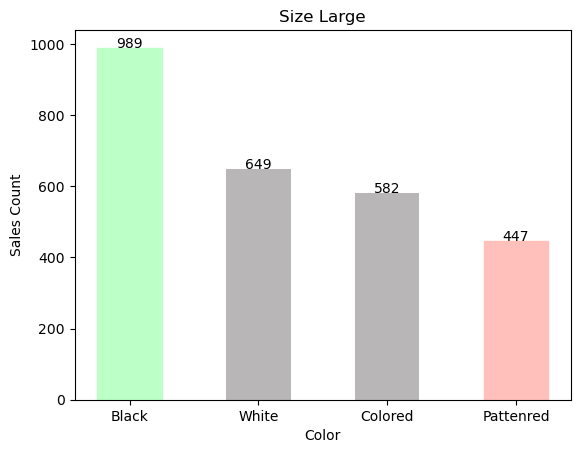

In [119]:
# Example: lets see the sales in color for size Medium
plot_bar(2,2,'Size','Color',final_dataframe) 

Correlation between  Color  and  Catagory is:  -0.01


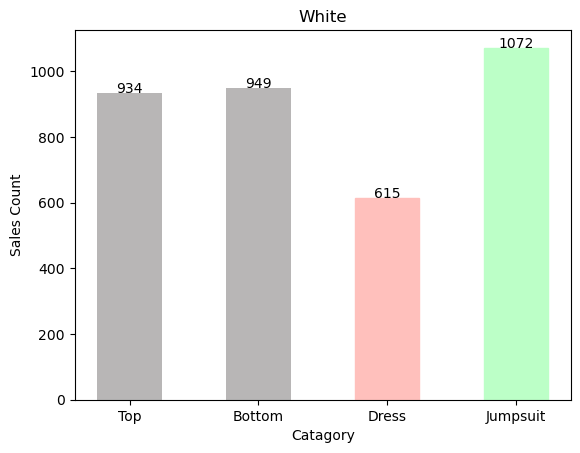

In [120]:
# Example: lets see Color White sales in diffrent Catagory
plot_bar(1,1,'Color','Catagory',final_dataframe) 

Correlation between  Age  and  Color is:  -0.0


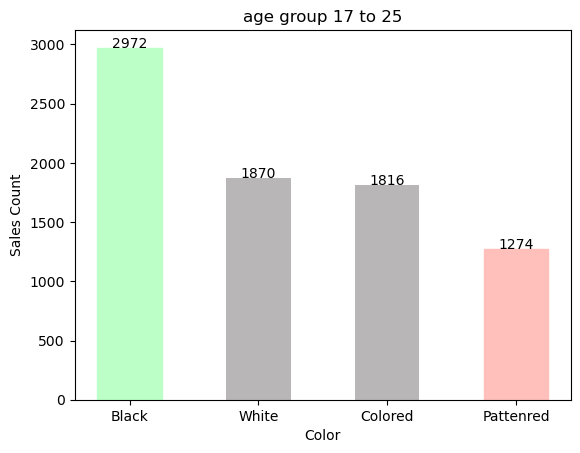

In [121]:
# Example: lets see Color Sales in age group 17-25
plot_bar(17,25,'Age','Color',final_dataframe) 

Correlation between  Color  and  Age is:  -0.0


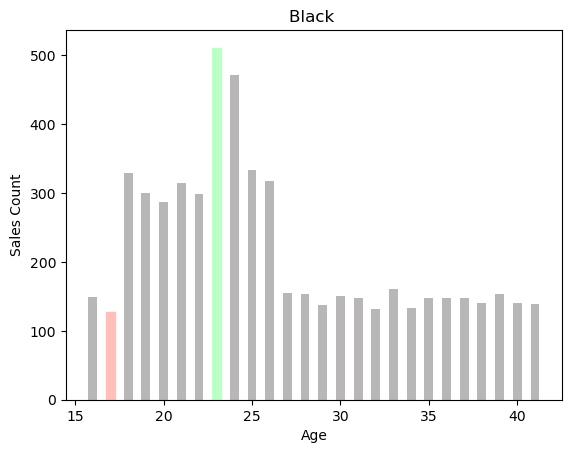

In [122]:
# Example: lets see color black sales in Diffrent Ages
plot_bar(0,0,'Color','Age',final_dataframe) 